# Introduction

More and more business are waking up to the value of their data and starting to realize the values of the data in terms of making profit through enhancing marketing productivity, improving customer relationships and building up competitive advantages. Online retailers collected a lot of customer online shopping data by tracking every transaction instantly and accurately. Those valuable data could help online retailers to gain deeper insights in the aspects of product trends, segmentation of customers and targeted personalized advertisements.

With data analysis and business intelligence, we could not only answer questions about how the business performed in the past, but also make predictions and help business make decisions. In this project, we conducted analysis on transactions data of an online shopping website during 2009 and 2011 period. The project answered questions about which products are fast growing and declining, analyzed customer purchase behavior and segmented customers into 4 major clusters, identified how each customer cluster are characterized, and studied products trends of loyal customer cluster.


# Background

Some researchers are working on building business intelligence for small online business by data mining, help them better understanding their customer and buliding a customer-centered marketing strategy. 

Probabilistic and machine learning models are used for customer segmentation, such as recency, frequency, and monetary value (RFM) model, hierarchical clustering, k-means and neural network. A great number of researchers have employed RFM model to determine the level of customers' loyalty. In this method, customers are divided into different groups based on RFM variables. Chen et, al. studied RFM model-based customer segmentation using data mining. On the basis of the RFM model, they segmented customers into groups using the k-means clustering algorithm and decision tree induction. The main characteristics of the consumers in each segment have been clearly identified. Later, they adopted a dynamic systems approach to address the dynamic prediction problem of customer profitability. Based on customer transaction records, RFM score-based time series are generated using cluster analysis. These time series are used to measure and describe customer profitability. 

With the inspiration of Chen's work, we conducted customer segmentation by k-means with more comprehensive customer purchase behavior features including frequency (transaction per month), monetary(amount), customer experience days, shopping hours, products veriety and so on.  

# Exploratory Data Analysis

In this project, the dataset is obtained from UCI Machine Learning Repository. It is a real online retail transaction data set called Online Retail II Data Set: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II.

The data sets contain 1067371 rows, each row represents one product in its transactions. It has 541909 entries, 8 attributes with 5 categorical, 2 numerical and 1 datetime, originally.
* Categorical features:
    * Invoice: invoice ID number 
    * StockCode: product ID number
    * Description: product name
    * Customer ID: customer ID
    * Country: the country of customer
* Numerical features:
    * Quantity: quantity of a product in one transaction
    * Price: price of one product
    * InvoiceDate: date of invoice

By analyzing each feature, it showed **"Customer ID"** had 22.77% missing values and **"Description"** had 0.41% missing values.

The total unique number of users is 5942, and total transaction is 53628 (the total number of unique Invoice number). All those transactions were distributed in 43 different countries, where most transactions happened in UK, followed by EIRE, Germany and France. The most popular product is "WHITE HANGING HEART T-LIGHT HOLDER", which appeared in 5918 transactions
	
Based on descriptive results, there are several issues. There is "nan" in the data sets, we need to replace them as NaN. The unique number of Description is more than the StockCode, so we need to check what the data looks like in the Description column. Therefore, we identified all the StockCode with more than one description and print out all the descriptions. There are negative numbers in the columns of quantity and price, which are other types of transaction including return, amazon fee, bank fee, bad debt and etc. Entries with negtive values were dropped.



## Mapbox Choropleth Maps about Sales by Countries

In Figure 1, the dark red area shows most of the sales come from United Kingdom which made 85% of overall revenue. The number of customers from United Kingdom is about 92% of all.

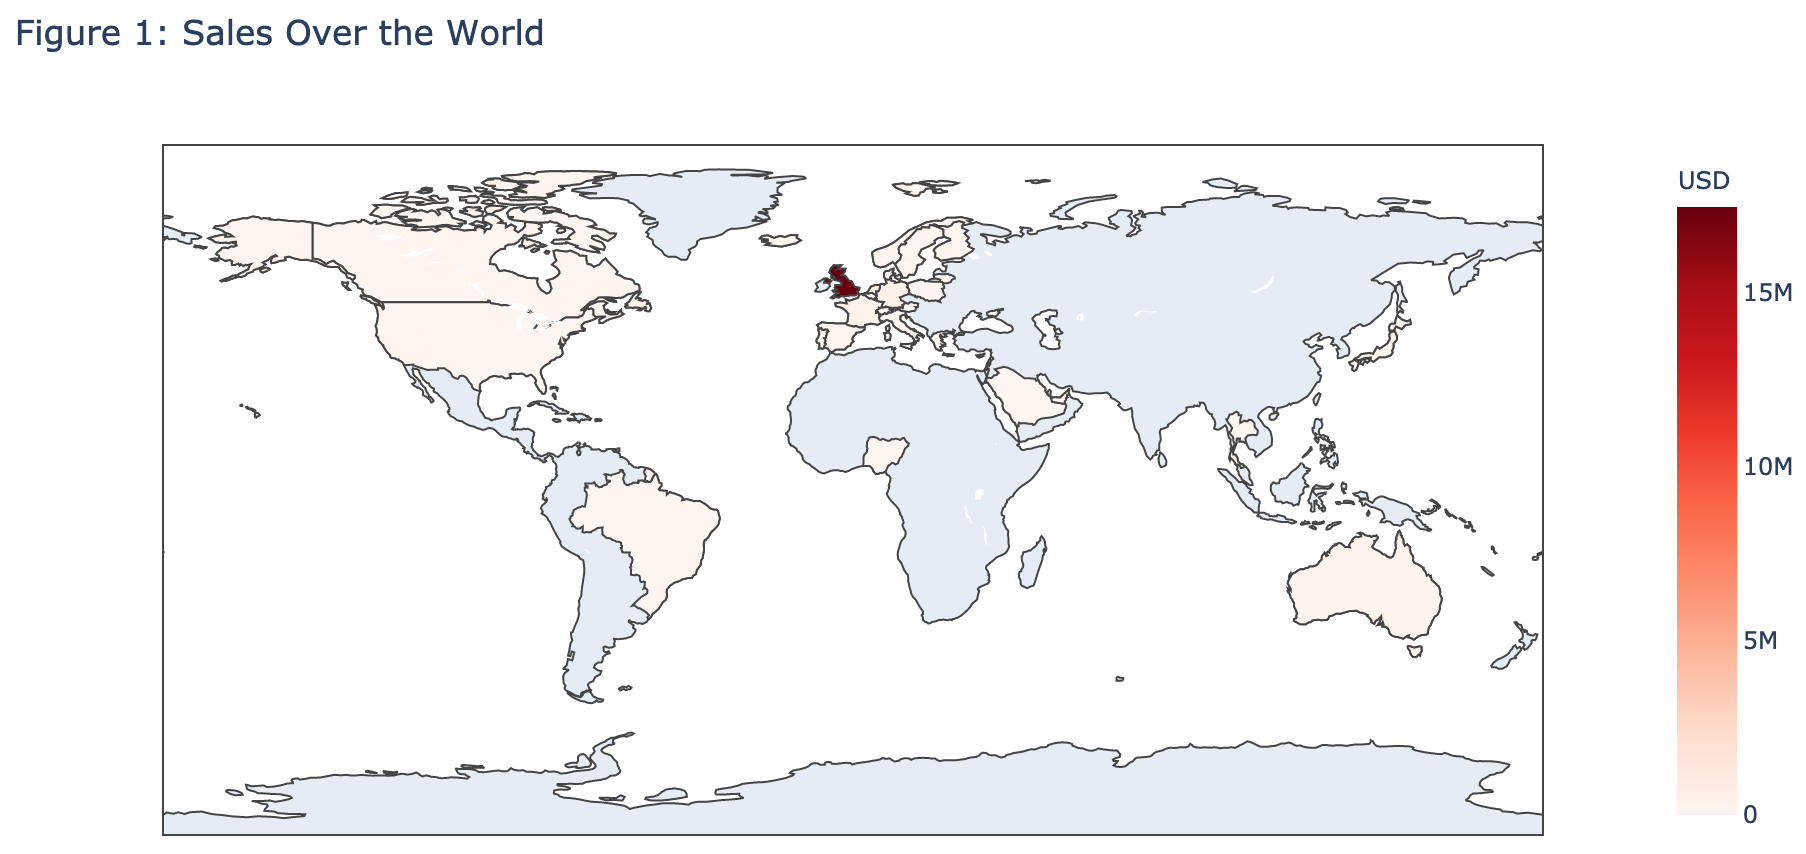

## Remove the United Kingdom to have a better view for rest of countries

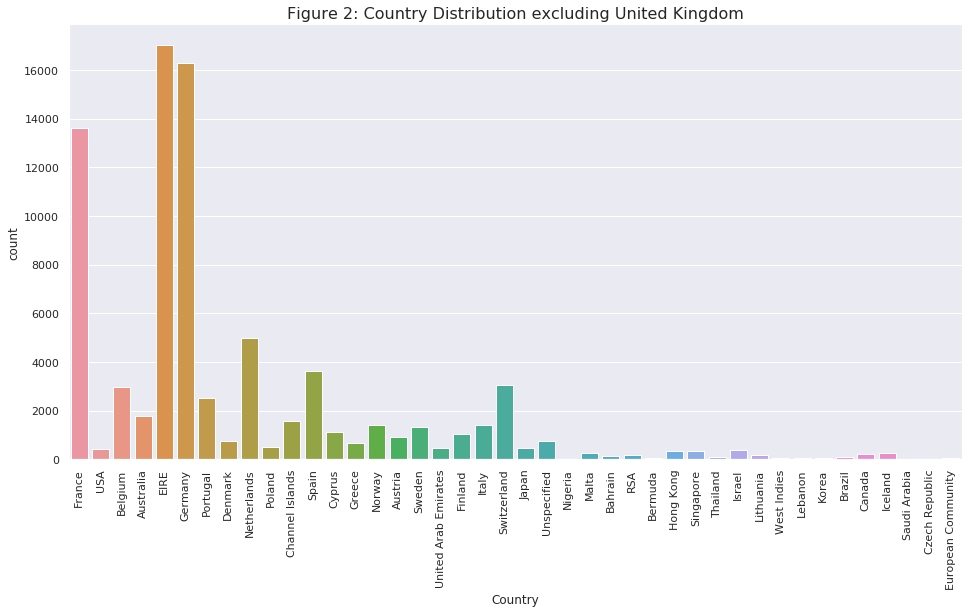

In [166]:
fig = sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='Country', data=retail_all_df[retail_all_df['Country']!="United Kingdom"])
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.title('Figure 2: Country Distribution excluding United Kingdom',Fontsize = 16)
plt.show()

Figure 2 is bar plot of count of customers from other countries except United Kingdom. Most customers are from European area, some are from North and South America, Australia and Asia.

# Sales Trends Analysis

In this section, we start to look into the sales change by quarter for each product and identify:
- Top 10 fast growing products in sales
- Top 10 fast declining products in sales

We grouped each product and calculate the quarterly sales. Then, we applied linear regression to estimate the increasing/decreasing trend along the quarters. We only calculated the products which have completely 9 quarters data, i.e. 2009Q4 to 2011Q4.

There are 4913 unique products in total.


## Top 10 Growing Products:

In [78]:
i = 0
print("Top 10 Growing Products: ")
for index, row in top10_prod_amount.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    
    print(str(np.array(row['Description'])[0]))
    i += 1

Top 10 Growing Products: 
TRADITIONAL WOODEN SKIPPING ROPE
RED SPOTTY CHARLOTTE BAG
STRAWBERRY CHARLOTTE BAG
ENGLISH ROSE NOTEBOOK A7 SIZE
FRENCH PAISLEY CUSHION COVER 
HOT BATHS METAL SIGN
FAIRY CAKES NOTEBOOK A7 SIZE
MIRROR MOSAIC VOTIVE HOLDER
HANGING WOOD AND FELT FLOWER
POSTAGE


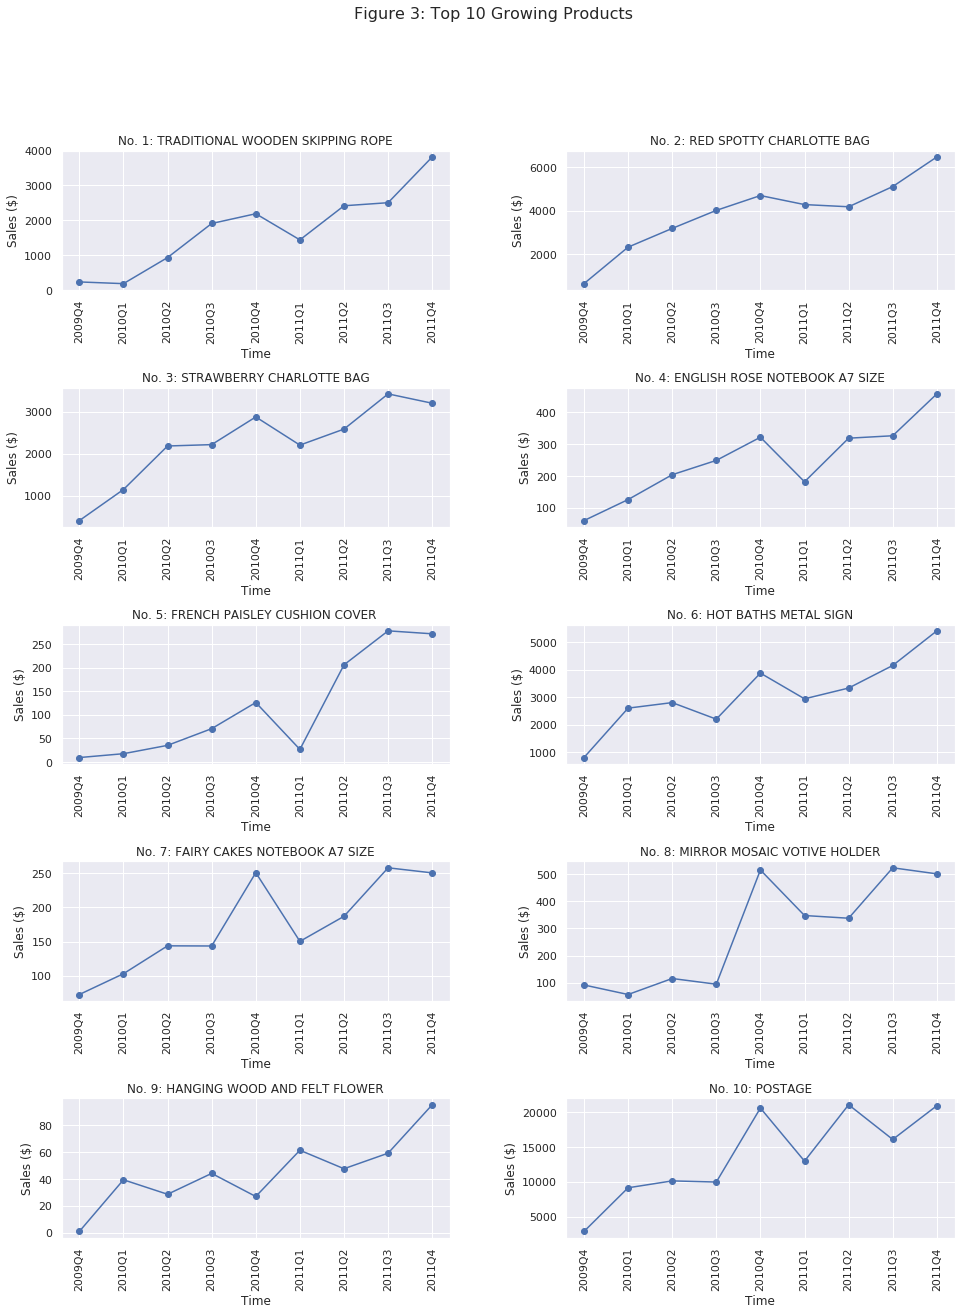

In [354]:
fig, axs = plt.subplots(5,2, figsize=(16, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=0.3)
fig.suptitle('Figure 3: Top 10 Growing Products', fontsize=16)
axs = axs.ravel()
i = 0
for index, row in top10_prod_amount.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    fig = axs[i].plot(amount.values, 'bo-')
    axs[i].set_xticklabels(("","2009Q4","2010Q1","2010Q2","2010Q3","2010Q4","2011Q1","2011Q2","2011Q3","2011Q4"),
                           rotation='vertical')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Sales ($)')
    axs[i].set_title(f"No. {i+1}: {str(np.array(row['Description'])[0])}")
    i += 1
plt.show()

## Bottom 10 Declining Products:

In [91]:
i = 0
print("Bottom 10 Declining Products: ")
for index, row in bottom10_prod_amount.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    
    print(str(np.array(row['Description'])[0]))
    i += 1

Bottom 10 Declining Products: 
SET OF 6 GIRLS CELEBRATION CANDLES
FIRE POLISHED GLASS NECKL GREEN
LOLITA  DESIGN  COTTON TOTE BAG
CANDLE PLATE LACE WHITE
FOLDING UMBRELLA , RED/WHITE SPOT
BLACK SILOUETTE CANDLE PLATE
PINK JEWELLED PHOTO FRAME
CERAMIC STRAWBERRY TRINKET TRAY
PINK DOUGHNUT TRINKET POT 
CERAMIC CAKE STAND + HANGING CAKES


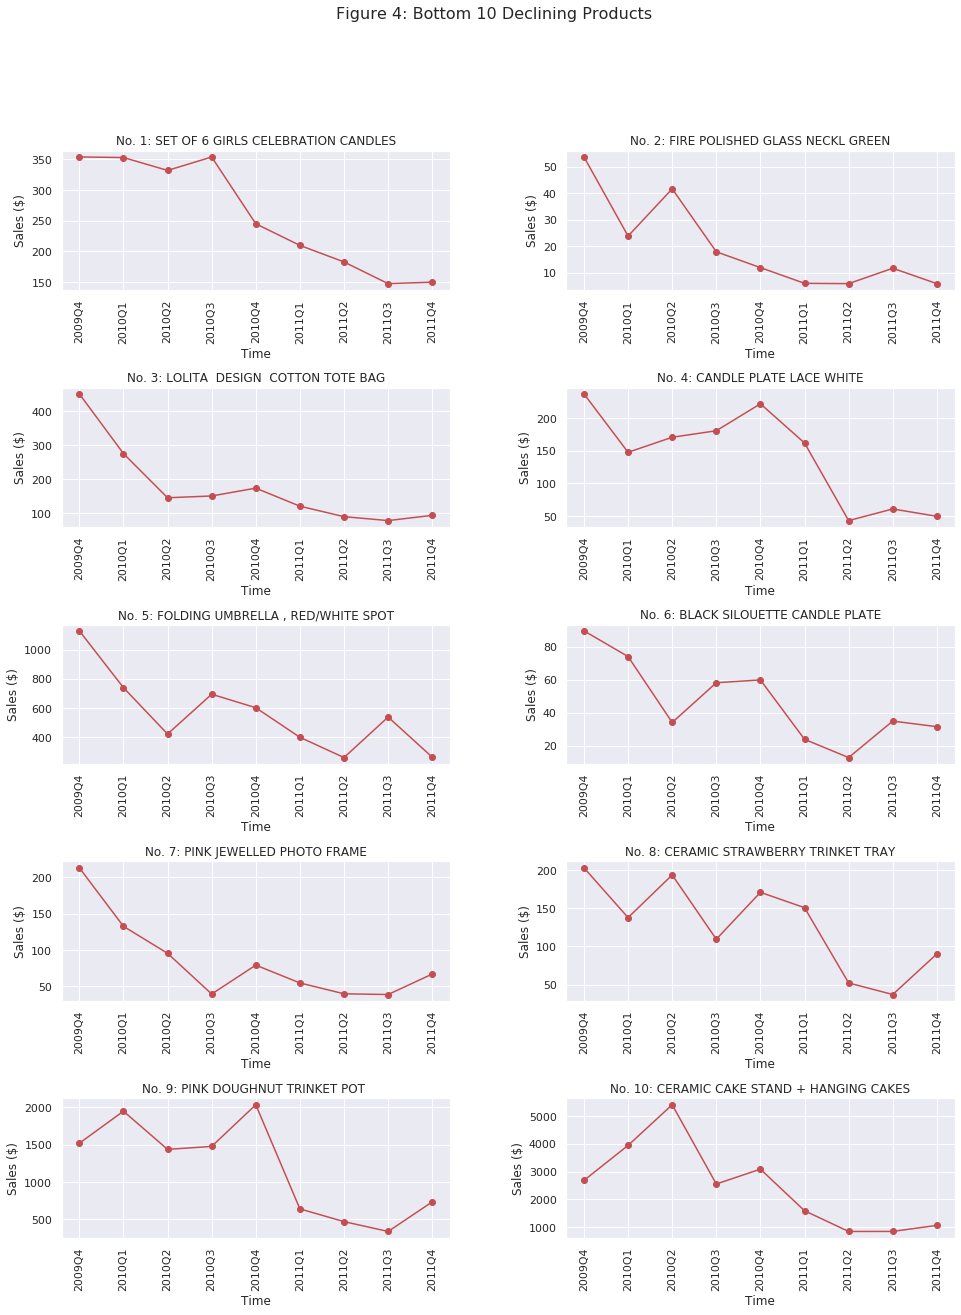

In [355]:
fig, axs = plt.subplots(5,2, figsize=(16, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=0.3)
fig.suptitle('Figure 4: Bottom 10 Declining Products', fontsize=16)
axs = axs.ravel()
i = 0
for index, row in bottom10_prod_amount.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    a = axs[i].plot(amount.values, 'ro-')
    axs[i].set_xticklabels(("","2009Q4","2010Q1","2010Q2","2010Q3","2010Q4","2011Q1","2011Q2","2011Q3","2011Q4"),
                           rotation='vertical')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Sales ($)')
    axs[i].set_title(f"No. {i+1}: {str(np.array(row['Description'])[0])}")
    i += 1
plt.show()

# Custom Segmentation

## Customer Classification by K-means 

The variables are not on comparable scales, and the value ranges are quite different. As such, we used StandardScaler to normalize variables before the KMeans clustering analysis. Four major clusters are identified with each cluster contains more than 100 customers. Those four clusters have about 99.45% of the total customer and the sales is about 88.13% of the total revenue, shown in Table 1.

The variables are not on comparable scales, and the value ranges are quite different. As such, we used StandardScaler to normalize viriables before the KMeans clustering analysis.

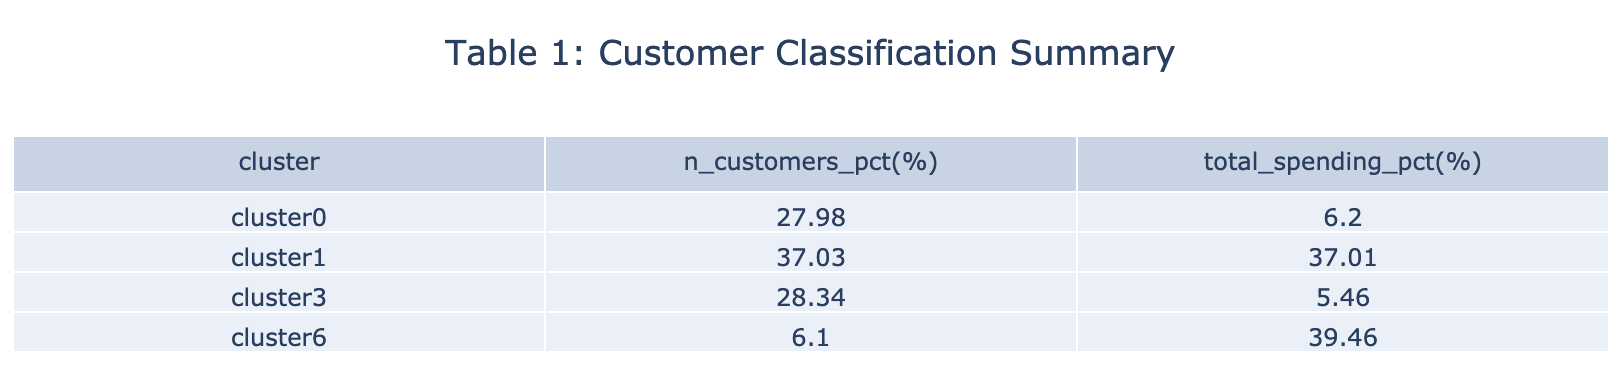

Figure 5 shows the box plots of categorical features of each customer cluster including month and weekday. For all clusters, more people shop in the late half of the year which maybe a reflection of holiday shopping. Thursdays and Wednesdays are busier than other days.

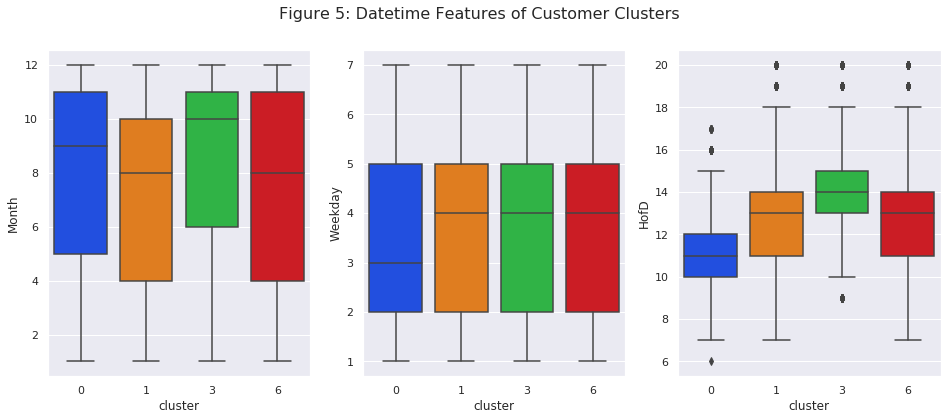

In [364]:
#boxplot about categorical features of customer cluster 
retail_all_cluster_df = retail_all_cluster_df.astype({"Month":'int', 'Weekday':'int', 'HofD':'int'})
retail_all_cluster_df['Weekday'] = retail_all_cluster_df['Weekday']-10
fig, axs = plt.subplots(1,3, figsize=(16, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)
fig.suptitle('Figure 5: Datetime Features of Customer Clusters', fontsize=16)
axs = axs.flatten()
sub = []
i = 0
for feature in ["Month","Weekday","HofD"]:
    data=retail_all_cluster_df[retail_all_cluster_df['cluster'].isin(cluster_list)][[feature,'cluster']]
    sns.boxplot(x='cluster', y=feature, data=data,
             palette=sns.color_palette("bright",4),
                ax=axs[i])
    i=i+1


Figure 6 bar plots show frequency (Transaction_per_month), product variety (Invoice|nunique), monetary (Amount|sum) and ExperienceDays of customer clusters.

Cluster 0 are customers with relatively low frequency (transaction per month) and monetary(amount). Every transaction, customers shop around 2 different kinds of products (Invoice|count) on average. They are customers with about 115 experience days. Cluster 0 is about 27.98% of the total customer and they shopped 6.2% of total revenue, shown in Table 1.

Cluster 3 is similar with cluster 0 with a little bit higher shopping frequency and less product variety than cluster 0. Cluster 3 customers have less experience day at about 102 days. Cluster 3 is about 28.34% of the total customer and 5.46% of total revenue, shown in Table 1.

Cluster 1 are customers with high frequency and moderate monetary (on average, every customer spends about 2970 dollars in the studied period). They shop on large variety of products (158 products on every transaction on average) and they are loyal customers with average experience days about 474 days. Cluster 1 is about 37.03% of the total customers and 37.01% of the total revenue, shown in Table 1.

Cluster 6 are customers with high frequency and high monetary. They are loyal customers with about average 648 experience days. Those customers shop for variety products (about 32 products for each transaction) with large quantity.  Cluster 4 is 6.1% of total customers and 39.46% of the total revenue, shown in Table 1.


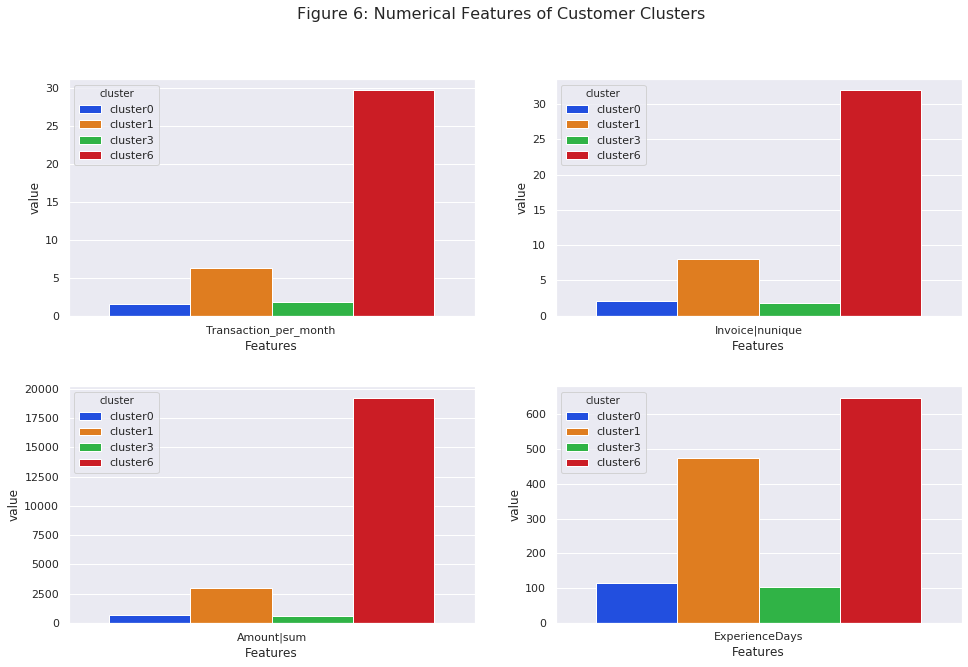

In [357]:
fig, axs = plt.subplots(2,2, figsize=(16, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)
fig.suptitle('Figure 6: Numerical Features of Customer Clusters', fontsize=16)

axs = axs.flatten()
sub = []
i = 0
for feature in ["Transaction_per_month","Invoice|nunique","Amount|sum","ExperienceDays",]:
    data=cluster_num_summary_trans.loc[cluster_num_summary_trans["Features"] == feature]
    sns.barplot(x="Features",y="value", hue="cluster", data=data,
             palette=sns.color_palette("bright", 4),ax=axs[i])
    i=i+1
    

To further investigate the difference between cluster 0 and cluster 3, histograms were ploted in Figure 7. Cluster 0 shops more lower price products than cluster3.

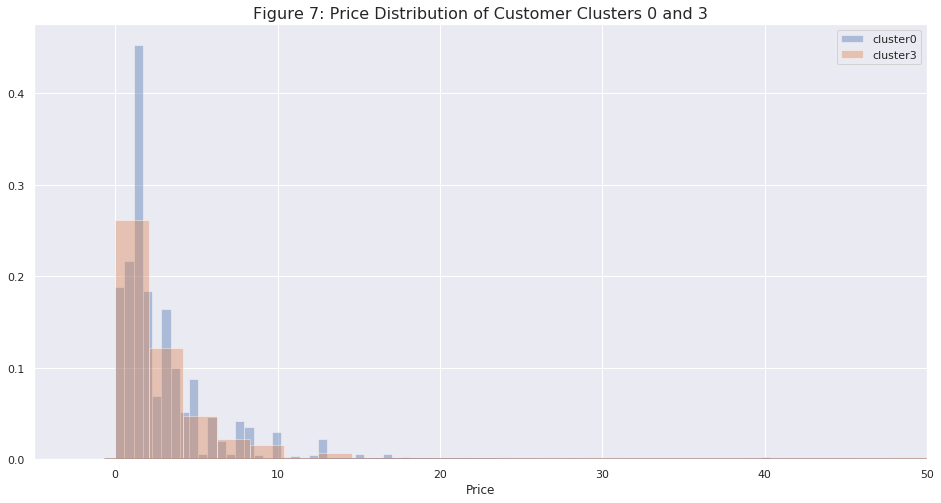

In [380]:
retail_all_cluster_df = retail_all_cluster_df.astype({"Price":'float'})
for cluster in [0,3]:
        data=retail_all_cluster_df[retail_all_cluster_df['cluster']==cluster]
        fig=sns.distplot(data['Price'],label = cluster,
        #color=sns.color_palette("bright",2),
        hist = True, kde = True,bins=2000,
                     
          )
plt.hist={'alpha':0.1}
plt.xlim(-5, 50)
plt.title('Figure 7: Price Distribution of Customer Clusters 0 and 3', fontsize=16)
plt.legend(['cluster0','cluster3'])
plt.show()

## Cluster 6 Loyal Customer Products Trend 

To further investigate customer shopping preference, we did linear regression to find the trend of top 10 most sales products for cluster 6 customers. The sales of postage in cluster 6, which is also in overall top 10 most increasing products overall list, takes up 29% of postage sales. The plots below also show some shopping patterns in some products, such as no.6 and no.7 products which show big growth in fourth quarter, no.2 and no.4 are trendy products with gradually increasing sales amount over time. While, some products, such as no.3, no.8 and no.10 products are showing some declining.

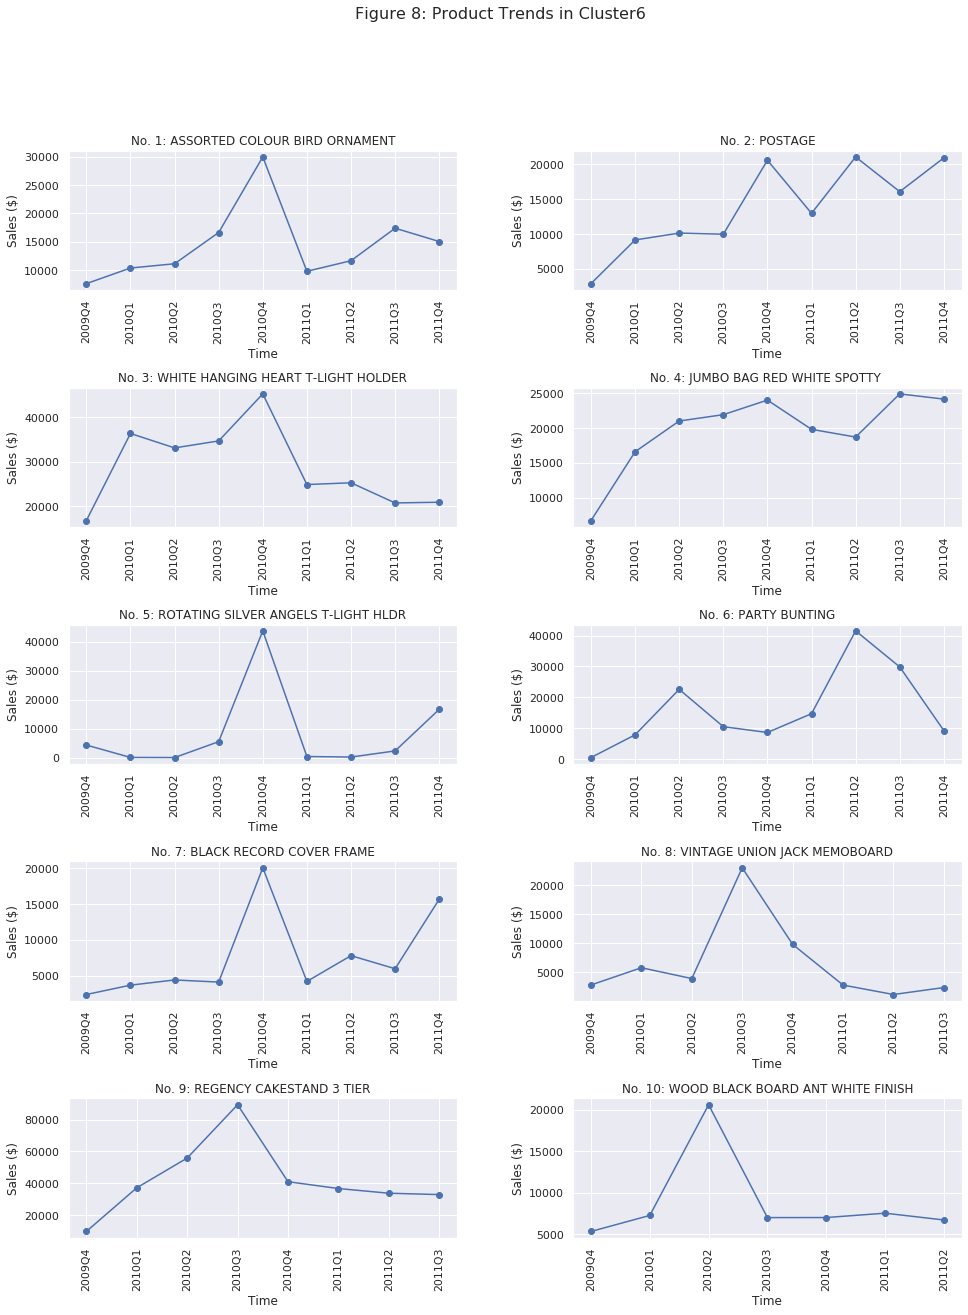

In [386]:
fig, axs = plt.subplots(5,2, figsize=(16, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=0.3)
fig.suptitle('Figure 8: Product Trends in Cluster6', fontsize=16)

axs = axs.ravel()
i = 0
for index, row in top_trends.iterrows():
    l, coef, amount, quantities, prices, description=prod_regr(row['StockCode'])
    axs[i].plot(amount.values, 'bo-')
    axs[i].set_xticklabels(("","2009Q4","2010Q1","2010Q2","2010Q3","2010Q4","2011Q1","2011Q2","2011Q3","2011Q4"),
                           rotation='vertical')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Sales ($)')
    axs[i].set_title(f"No. {i+1}: {str(np.array(row['Description'])[0])}")
    i += 1

## PCA Analysis

Principal Component Analysis (PCA) is used to visualize the customer cluster in 2D space. Before doing the visualization, an accumulated bar plot shown below indicating that we can only have about 47% information preserved with 2 principle components, and 10 principle components can retain more than 90% information.

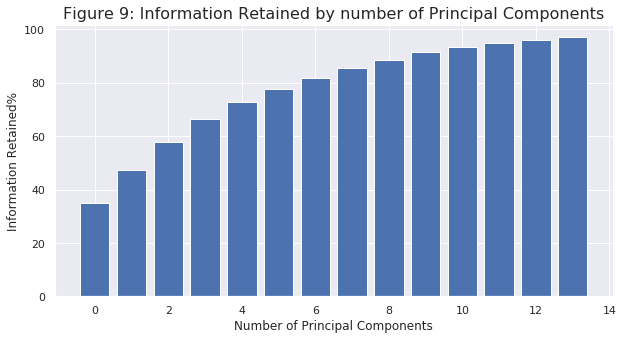

In [358]:
plt.figure(figsize=(10,5))
fig = plt.bar(range(0,14), information_retained_list)
plt.title('Figure 9: Information Retained by number of Principal Components',Fontsize = 16)
plt.xlabel('Number of Principal Components')
plt.ylabel('Information Retained%')
plt.show()

Scatter plots (Figure 9) below shows different customer clusters in different colors. By using 2 principle components from PCA, cluster0 and cluster 3 are greatly overlaped. There are also some outliers in each cluster, especially in cluster 6 (business customer).

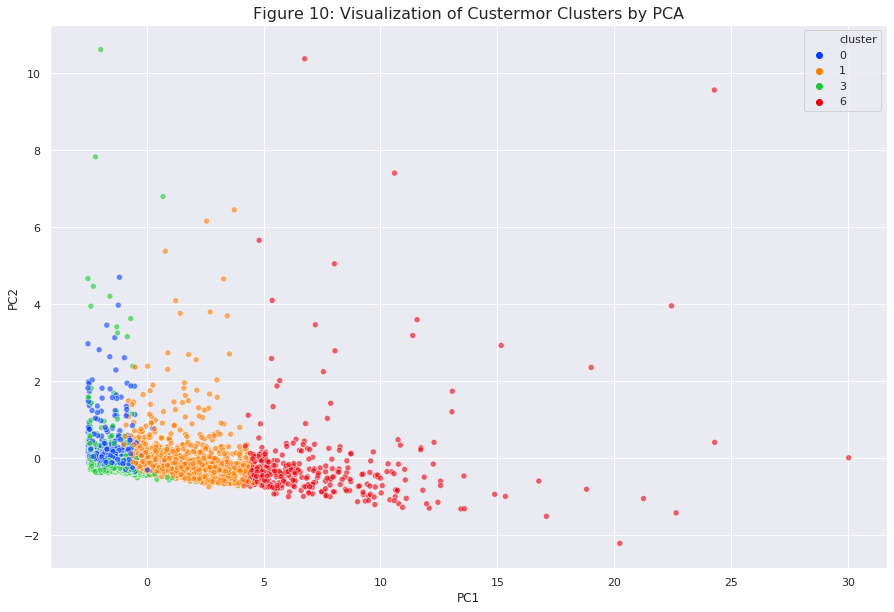

In [362]:
plot_customer_cluster_pca()

T-SNE could show customer clusters with 10 principle components which represent more than 90% of information. With this k-means model, there are some impurities between cluster 0, cluster 1 and cluster 3 at the edges. Overall, this model could nicely seperate customers into 4 major clusters.

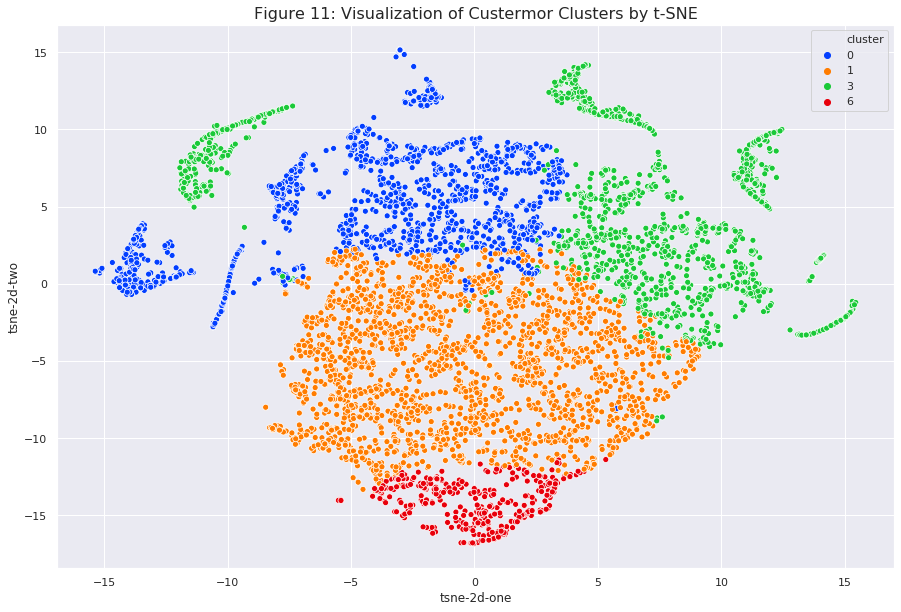

In [363]:
# plot tsne
plt.figure(figsize=(15,10))
fig = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=selected_df_tsne_join_label_id['cluster'],
    palette=sns.color_palette("bright", 4),
    data=selected_df_tsne_join_label_id,
    legend="full",
    alpha=1
)
plt.title("Figure 11: Visualization of Custermor Clusters by t-SNE", Fontsize = 16)
plt.show()

# Conclusion

In this project, we have conducted data analytics on the historical transaction data of a online retail. We have cleaned the data and utilized regression, clustering, visualization methods to get insight into the products and customers. The results provided actionable insights for the retailer in order to better engage the customer and preparing the stocks. 

By understanding the product sales trends, the retailed will be well prepared in the stock planning and prioritize the resources.

By segmenting the users into groups, the retailer will provide better and accurate services through targeted advertisement and engagement, and therefore provide extraordinary experience for their customers. This will provide competitive edge for the retailer in the highly competitive environment. 



# References

* Chen, D. Sain, S.L., and Guo, K. (2012), Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208. 

* Chen, D., Guo, K. and Ubakanma, G. (2015), Predicting customer profitability over time based on RFM time series, International Journal of Business Forecasting and Marketing Intelligence, Vol. 2, No. 1, pp.1-18.

* Chen, D., Guo, K., and Li, Bo (2019), Predicting Customer Profitability Dynamically over Time: An Experimental Comparative Study, 24th Iberoamerican Congress on Pattern Recognition (CIARP 2019), Havana, Cuba, 28-31 Oct, 2019. 

* Laha Ale, Ning Zhang, Huici Wu, Dajiang Chen, and Tao Han, Online Proactive Caching in Mobile Edge Computing Using Bidirectional Deep Recurrent Neural Network, IEEE Internet of Things Journal, Vol. 6, Issue 3, pp. 5520-5530, 2019.

* Rina Singh, Jeffrey A. Graves, Douglas A. Talbert, William Eberle, Prefix and Suffix Sequential Pattern Mining, Industrial Conference on Data Mining 2018: Advances in Data Mining. Applications and Theoretical Aspects, pp. 309-324. 2018. 

